<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201/potato/Group_Potato_Flight_Cancellation_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :

      Kong Jia Rou   (A20EC0198)
      Yong Zhi Yan   (A20EC0172)

# **Flight Delays and Cancellations at 2015**

In this project, we will be using the dataset, *2015 Flight Delays and Cancellations* retrieved from Kaggle. 


---


The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


Attribute Information:

| Attribute | Description |
| --- | --- |
| **YEAR** |  Year of the Flight Trip |
|**MONTH** |   Month of the Flight Trip |
| **DAY** | Day of the Flight Trip |
| **DAY_OF_WEEK** |  Day of week of the Flight Trip |
| **AIRLINE** |  Airline Identifier |
| **FLIGHT_NUMBER** |    Flight Identifier |
| **TAIL_NUMBER** |   Aircraft Identifier |
| **ORIGIN_AIRPORT** |   Starting Airport |
|**DESTINATION_AIRPORT** |   Destination Airport |
| **SCHEDULED_DEPARTURE** |    Planned Departure Time |
|**DEPARTURE_TIME** |   Month of the Flight Trip |
| **DEPARTURE_DELAY** | WHEEL_OFF - TAXI_OUT |
| **TAXI_OUT** |  The time duration elapsed between departure from the origin airport gate and wheels off |
| **WHEELS_OFF** |  The time point that the aircraft's wheels leave the ground |
| **SCHEDULED_TIME** |    Planned time amount needed for the flight trip |
| **ELAPSED_TIME** |   AIR_TIME+TAXI_IN+TAXI_OUT |
| **AIR_TIME** |   The time duration between wheels_off and wheels_on time |
|**DISTANCE** |   Distance between two airports |
| **WHEELS_ON** |   The time point that the aircraft's wheels touch on the ground |
| **TAXI_IN** |   The time duration elapsed between wheels-on and gate arrival at the destination airport |
|**SCHEDULED_ARRIVAL**|Planned arrival time|
|**ARRIVAL_TIME**|WHEELS_ON+TAXI_IN|
|**ARRIVAL_DELAY**|ARRIVAL_TIME-SCHEDULED_ARRIVAL|
|**DIVERTED**|Aircraft landed on airport that out of schedule|
|**CANCELLED**|Flight Cancelled (1 = cancelled)|
|**CANCELLATION_REASON**|Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security|
|**AIR_SYSTEM_DELAY**|Delay caused by air system|
|**SECURITY_DELAY**|Delay caused by security|
|**AIRLINE_DELAY**|Delay caused by the airline|
|**LATE_AIRCRAFT_DELAY**|Delay caused by aircraft|
|**WEATHER_DELAY**|Delay caused by weather|


The technique/tool used we used in this Big data analysis including:


*   Numpy
*   Random
*   seaborn
*   matplotlib.pyplo
*   plotly.express
*   folium
*   Pandas

## Downloading the Dataset

1.   To begin this project, download *flights.csv* from the link [Dataset : 2015 Flight Delays and Cancellations.](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)

2. Upload the file to Google Drive.

3. Run the code below to connect your Google Collab with Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once these step are done, you are ready to proceed with the next step.

## Data Preparation and Cleaning
Data preparation is the process of transforming raw data prior to processing and analysis. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.It is an important step prior to processing and often involves reformatting data, making corrections to data, and combining datasets to enrich data.


First, import the library. We will be using pandas to read CSV file.

In [ ]:
import pandas as pd
import random as rd

Read the CSV file. You could see the sample of the DataFrame with head().

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/flights.csv'
dataset = pd.read_csv(filename)
dataset.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


By using the .shape attribute, we can see the dataframe dimensionality. The result is a tuple containing the number of rows and columns.



*   In this dataset, we have 5819079 rows and 31 columns.

In [ ]:
dataset.shape

(5819079, 31)

By using .info attribute, we can see the overview of every columns information the dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

We will be selecting the rows which the flight is cancelled only.

In [ ]:
df = dataset.loc[dataset['CANCELLED']==1]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


Next, we will be identifying whether there is any ocurrence of missing value in the dataset.

In [ ]:
df.isna().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
DISTANCE                   0
WHEELS_ON              89884
TAXI_IN                89884
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

Drop the rows and columns that contain null values.

In [ ]:
df.drop(['DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','AIR_SYSTEM_DELAY',
         'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df=df.dropna()

Check again to ensure there is no missing value occur in the dataset.

In [ ]:
df.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

From the output above, we can conclude that there are no missing values in the dataset.

Change the data type of 'MONTH' to object.

In [ ]:
df['MONTH'] = df['MONTH'].astype(object)

<ipython-input-37-23f8fed29f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].astype(object)


In [ ]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,CANCELLATION_REASON
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,205.0,1448,600,0,1,A
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,120.0,868,500,0,1,B
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,87.0,429,637,0,1,B
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,95.0,364,700,0,1,B
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,90.0,199,700,0,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816994,2015,12,31,4,EV,4442,N12167,IAH,HOB,1800,107.0,501,1847,0,1,B
5817980,2015,12,31,4,OO,5359,N915SW,DEN,MAF,1940,105.0,563,2225,0,1,B
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,337.0,2267,2256,0,1,A
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,175.0,1176,50,0,1,A


After done creating a sample, the data is ready to proceed with the next step.

## Exploratory Analysis and Visualization

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.describe()

,YEAR,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
count,75158.0,75158.000000,75158.000000,75158.000000,75158.000000,75158.000000,75158.000000,75158.000000,75158.0,75158.0
mean,2015.0,15.269818,3.630299,2967.617379,1390.450890,117.852151,608.686607,1536.893265,0.0,1.0
std,0.0,9.253266,2.133644,1827.840690,496.920545,57.720403,453.686495,525.305542,0.0,0.0
min,2015.0,1.000000,1.000000,1.000000,1.000000,20.000000,21.000000,1.000000,0.0,1.0
25%,2015.0,7.000000,2.000000,1296.000000,945.000000,76.000000,285.000000,1115.000000,0.0,1.0
50%,2015.0,16.000000,3.000000,3101.000000,1435.000000,104.000000,488.000000,1612.000000,0.0,1.0
75%,2015.0,24.000000,6.000000,4432.000000,1820.000000,145.000000,802.000000,2000.000000,0.0,1.0
max,2015.0,31.000000,7.000000,9855.000000,2359.000000,614.000000,4962.000000,2359.000000,0.0,1.0


###1. Bar Chart : Number of Flight Cancellations per Month

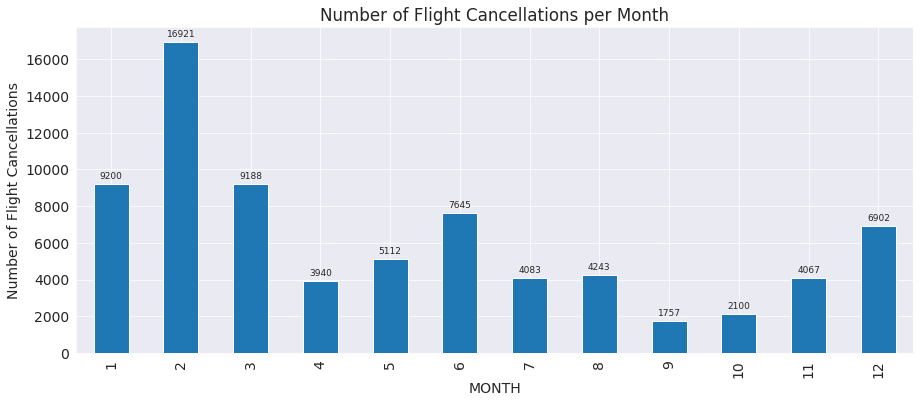

In [ ]:
plt.figure(figsize=(15,6))

sum_of_cc = df.groupby('MONTH')['CANCELLED'].sum()

plt.ylabel('Number of Flight Cancellations')
plt.title('Number of Flight Cancellations per Month')
bar_chart = sum_of_cc.plot.bar()

for bar in bar_chart.patches:
  bar_chart.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

###2. Line Chart : Number of Flight Cancellations per Month of each Airline

Text(0.5, 1.0, 'Number of Flight Cancellations per Month of each Airline')

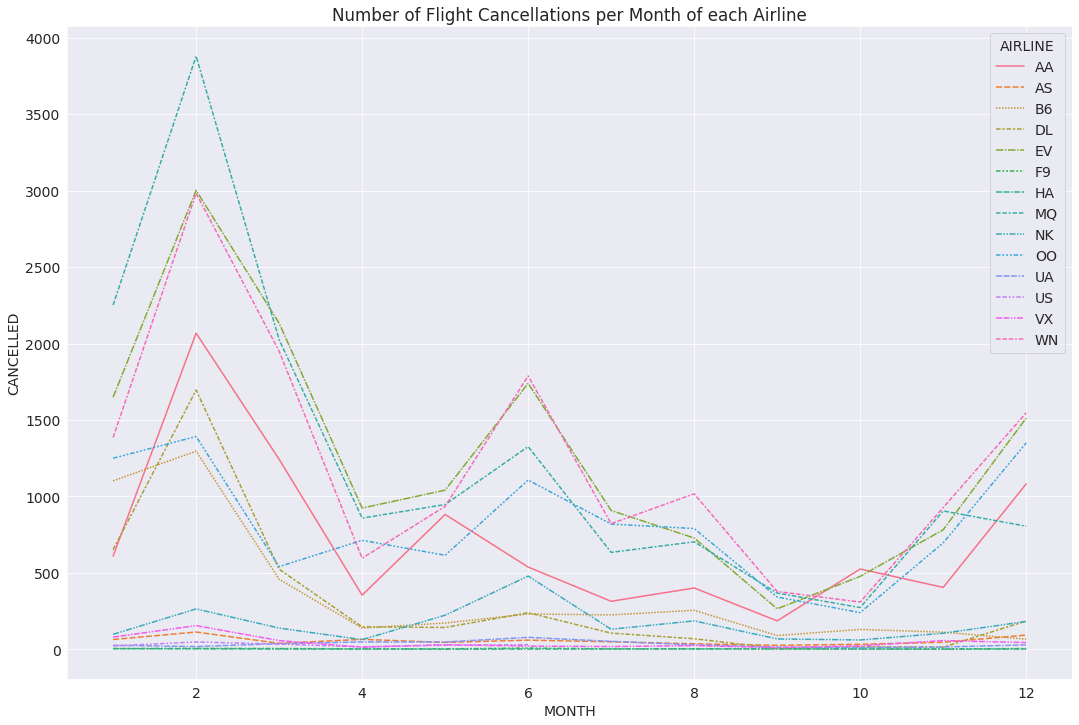

In [ ]:
plt.figure(figsize=(18,12))

cc_airline = df.groupby(['MONTH','AIRLINE'], as_index=False)['CANCELLED'].sum()

sns.lineplot(data = cc_airline, x ='MONTH', y='CANCELLED', hue='AIRLINE', style='AIRLINE')
plt.title('Number of Flight Cancellations per Month of each Airline')

###3. Box Plot : Number of Flight Cancellations based on Cancellation Reason

Text(0.5, 1.0, 'Number of Flight Cancellations based on Cancellation Reason')

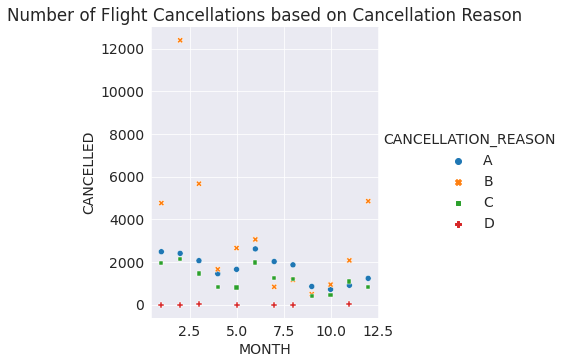

In [ ]:
cc_reason = df.groupby(['MONTH','CANCELLATION_REASON'], as_index=False)['CANCELLED'].sum()

sns.relplot(data = cc_reason, x ='MONTH', y='CANCELLED', hue='CANCELLATION_REASON', style='CANCELLATION_REASON')
plt.title('Number of Flight Cancellations based on Cancellation Reason')


###4. Pie Chart : Percentage of each Flight Cancellations Reason

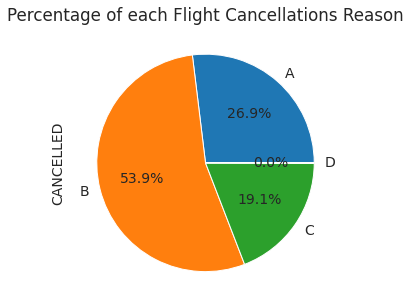

In [ ]:
plt.figure(figsize = (5, 5))
data = df.groupby('CANCELLATION_REASON')['CANCELLED'].sum()
plt.title('Percentage of each Flight Cancellations Reason')
data.plot.pie(autopct='%.1f%%')

###5. Heat Map

A relationship between variables in the dataset could be explored using scatter plots or regression plots in Matplotlib or Seaborn.

To distinguish the relationship between all the variables in the dataset, a correlation analysis heatmap is performed.

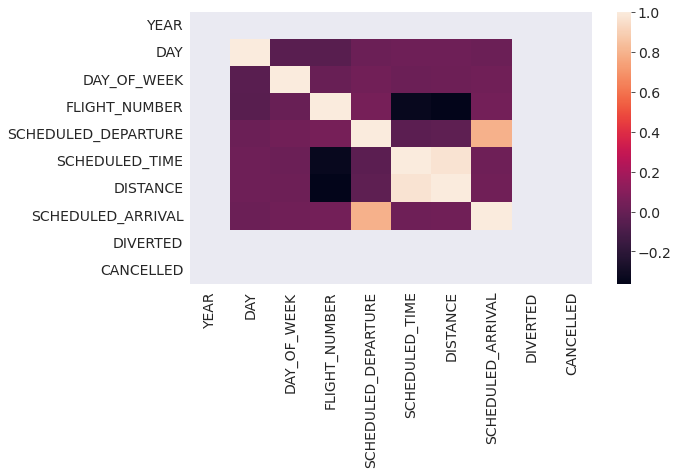

In [ ]:
sns.heatmap(df.corr())

## Asking and Answering Questions

In this part, we will be achieving the objectives of this project by answering the objectives. To answer the objectives, we will compute the results using Numpy/Pandas and plotting the graphs using Matplotlib/Seaborn.



#### Q1: Investigating the top 5 month according to the highest mean of number of flight cancellations

In [ ]:
top_agegroup = df.groupby(['MONTH'], as_index=False)['CANCELLED'].mean()
top_agegroup = top_agegroup.sort_values(by=['CANCELLED'], ascending=False)[:5]
print(top_agegroup)

   MONTH  CANCELLED
0      1        1.0
1      2        1.0
2      3        1.0
3      4        1.0
4      5        1.0


#### Q2: Studying the highest record of flight cancellation in 2015

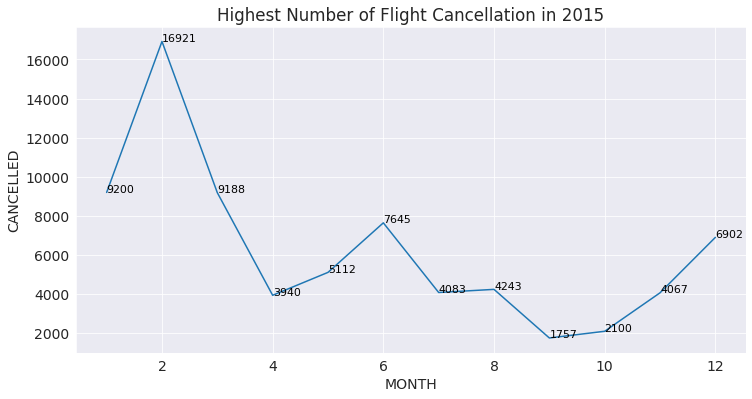

In [ ]:
plt.figure(figsize=(12,6))

max_num = df.groupby(['MONTH'], as_index=False)['CANCELLED'].sum()
sns.lineplot(data = max_num, x ='MONTH', y='CANCELLED')
plt.title('Highest Number of Flight Cancellation in 2015')

for x, y in zip(max_num['MONTH'], max_num['CANCELLED']):
  plt.text(x = x, y = y+10, s = '{:.0f}'.format(y), color = 'black', size = 11)

#### Q3: Examining the most common flight cancellation reason in 2015

In [ ]:
data = df.groupby('CANCELLATION_REASON')['CANCELLED'].sum()
data

CANCELLATION_REASON
A    20241
B    40527
C    14368
D       22
Name: CANCELLED, dtype: int64

#### Q4: Exploring the top 3 airline that has the highest record of flight cancellation in 2015

In [ ]:
top_airline = df.groupby(['AIRLINE'], as_index=False)['CANCELLED'].sum()
top_airline = top_airline.sort_values(by=['CANCELLED'], ascending=False)[:5]
top_airline

,AIRLINE,CANCELLED
4,EV,15161
7,MQ,14977
13,WN,14638
9,OO,9855
0,AA,8608


#### Q5: Finding the relationship between airline and the flight cancellation reason

In [ ]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult = pd.crosstab(index=df['AIRLINE'],columns=df['CANCELLATION_REASON'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# We assume that, H0: the two variables are not correlated with each other
# If P-Value > 0.05, then we accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

CANCELLATION_REASON     A     B     C   D
AIRLINE                                  
AA                   2067  6182   355   4
AS                    334   317    18   0
B6                    883  2464   928   1
DL                    594  2947   257   0
EV                   3597  5074  6489   1
F9                     23    19     0   0
HA                     18     0     0   0
MQ                   2475  9116  3385   1
NK                    654  1064   278   3
OO                   3202  5450  1203   0
UA                    274   109    23   0
US                     89    69    19   0
VX                    157    12   365   0
WN                   5874  7704  1048  12
The P-Value of the ChiSq Test is: 0.0


As the output of the P-value is 0.0, hence, we reject H0. This means the airline and flight cancellation reasons are correlated with each other.

## Inferences and Conclusion


## References and Future Work



*   The Chi-square formula is a statistical method to compare two or more data samples. Pearson’s chi-squared test is a hypothesis test that is used to determine whether there is a significant association between two categorical variables in the data. The test involves two hypotheses where H0 : The two categorical variables have no relationship (independent); H1 : There is a relationship (dependent) between two categorical variables        Reference : https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/-a-categorical-variable-in-python/

*   Exploratory Data Analysis helps in identifying any outlier data points, understanding the relationships between the various attributes and structure of the data, recognizing the important variables. It helps in framing questions and visualizing the results, paving the way to make an informed choice of the machine learning algorithm for the problem at hand. Reference : https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-with-an-example/


